# Cryptocurrency Data Analysis and correlation between the Bitcoin Price and other factors

###STEP 1: Importing all the necessary libraries

In [1]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np 
import pandas as pd
import csv
from datetime import datetime
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys

In [3]:
# import pandas as pd       
# # from fbprophet import Prophet
# import prophet 


In [4]:
import plotly.offline as py           
import plotly.graph_objs as go        
import plotly.express as px           

In [5]:
import plotly.io as pio
pio.renderers.default = 'colab'    

###STEP 2 : Importing the cryptocurrency dataset and analyzing it

In [6]:
# from google.colab import files
# uploaded = files.upload()

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks Dec_8_22/3rd Big_Data/top_coins.csv')

In [9]:
df

Date     Open     High      Low    Close  Adj Close     Volume  \
0      10/1/2015  236.004  238.445  235.616  237.549    237.549   20488800   
1      10/2/2015  237.264  238.541  236.603  237.293    237.293   19677900   
2      10/3/2015  237.202  239.315  236.944  238.730    238.730   16482700   
3      10/4/2015  238.531  238.968  237.940  238.259    238.259   12999000   
4      10/5/2015  238.147  240.383  237.035  240.383    240.383   23335900   
...          ...      ...      ...      ...      ...        ...        ...   
35733  9/26/2020   68.514   69.631   68.514   69.184     69.184  298621240   
35734  9/27/2020   69.183   69.885   67.430   68.749     68.749  284471075   
35735  9/28/2020   68.749   70.044   67.517   67.521     67.521  296838687   
35736  9/29/2020   67.511   68.794   67.040   68.659     68.659  286638250   
35737  9/30/2020   68.596   69.109   66.886   69.109     69.109  266434156   

      Currency  
0      Bitcoin  
1      Bitcoin  
2      Bitcoin  
3      Bitcoin  
4      Bitcoin  
...        ...  
35733     Dash  
35734     Dash  
35735     Dash  
35736     Dash  
35737     Dash  

[35738 rows x 8 columns]

In [10]:
#groupby
df.groupby(['Currency']).count()

Date  Open  High   Low  Close  Adj Close  Volume
Currency                                                      
Binance Coin  2326  2326  2326  2326   2326       2326    2326
Bitcoin       3652  3652  3652  3652   3652       3652    3652
Bitcoin Cash  2330  2330  2330  2330   2330       2330    2330
Cardano       1080  1080  1080  1080   1080       1080    1080
Chainlink     2212  2212  2212  2212   2212       2212    2212
Dash          3652  3652  3652  3652   3652       3652    3652
Ethereum      3652  3652  3652  3652   3652       3652    3652
Litecoin      3652  3652  3652  3652   3652       3652    3652
Ripple        3652  3652  3652  3652   3652       3652    3652
Stellar       3652  3652  3652  3652   3652       3652    3652
Tether        3652  3652  3652  3652   3652       3652    3652
Tron          2226  2226  2226  2226   2226       2226    2226

In [11]:
# df.info

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35738 entries, 0 to 35737
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       35738 non-null  object 
 1   Open       35738 non-null  float64
 2   High       35738 non-null  float64
 3   Low        35738 non-null  float64
 4   Close      35738 non-null  float64
 5   Adj Close  35738 non-null  float64
 6   Volume     35738 non-null  int64  
 7   Currency   35738 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 2.2+ MB


In [13]:
df.describe()

Open          High           Low         Close     Adj Close  \
count  35738.000000  35738.000000  35738.000000  35738.000000  35738.000000   
mean     620.119789    637.314368    601.817993    620.692862    620.692862   
std     2052.719483   2108.318553   1990.850820   2054.123362   2054.123362   
min        0.001000      0.002000      0.001000      0.001000      0.001000   
25%        0.260000      0.275000      0.251000      0.261000      0.261000   
50%        4.019000      4.119000      3.920000      4.025000      4.025000   
75%      162.596000    168.243000    156.815000    162.891000    162.891000   
max    19475.801000  20089.000000  18974.100000  19497.400000  19497.400000   

             Volume  
count  3.573800e+04  
mean   2.862706e+09  
std    7.715742e+09  
min    1.160000e+02  
25%    2.608815e+07  
50%    2.482212e+08  
75%    1.595345e+09  
max    9.931533e+10

###STEP 3: Data Visualization- All top Cruptcurrencies

Table : Visualizing data 

In [14]:
from plotly.figure_factory import create_table
table = create_table(df.head(10), colorscale='plasma')
py.iplot(table)

In [15]:
# from plotly.figure_factory import create_table
# table = create_table(df.head(10), colorscale='blues')
# py.iplot(table)

###STEP 4 : Analyzing volume & price and comparison between currancies

Box plot : Analyzing volume

In [16]:
px.box(df, x='Currency', y='Volume')

Pie Chart : Analyzing volume

In [17]:
px.pie(df, values='Volume', names='Currency')

Violin Plot: Analyzing Price

In [18]:
px.violin(df, x='Currency',  y="Close")

In [19]:
px.box(df, x='Currency',  y="Close", log_y=True)

Scatter Plots : Comparing between Currencies

In [20]:
px.scatter(df, x='Close', y='Volume', hover_data=['High','Low','Date'], color='Currency', height=400)

In [21]:
#with log function
px.scatter(df, x='Close', y='Volume', hover_data=['High','Low','Date'], color='Currency', height=400, log_x=True, log_y=True)

###STEP 5 : Addinng new files which have effect of the Bitcoin price

In [23]:
# from google.colab import drive
# drive.mount('/content/drive')

In [24]:
df_bitcoin = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks Dec_8_22/3rd Big_Data/input/bitcoin_price.csv')

In [26]:
# import numpy as np
# import pandas as pd 
# import csv
# from datetime import datetime
# import seaborn as sns
# color = sns.color_palette()
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import sys

In [27]:
import os
print(os.listdir("/content/drive/MyDrive/Colab_Notebooks Dec_8_22/3rd Big_Data/input"))

['bitcoin_cash_price.csv', 'bitcoin_dataset.csv', 'bitconnect_price.csv', 'dash_price.csv', 'ethereum_classic_price.csv', 'ethereum_dataset.csv', 'ethereum_price.csv', 'iota_price.csv', 'litecoin_price.csv', 'monero_price.csv', 'nem_price.csv', 'neo_price.csv', 'numeraire_price.csv', 'omisego_price.csv', 'qtum_price.csv', 'ripple_price.csv', 'stratis_price.csv', 'waves_price.csv', 'bitcoin_price.csv']


In [28]:
#Preprocessing bitcoin_price.csv to get the date in right format

bit_price_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks Dec_8_22/3rd Big_Data/input/bitcoin_price.csv')

bit_price_df.head()

Date     Open     High       Low    Close         Volume  \
0  Feb 20, 2018  11231.8  11958.5  11231.80  11403.7  9,926,540,000   
1  Feb 19, 2018  10552.6  11273.8  10513.20  11225.3  7,652,090,000   
2  Feb 18, 2018  11123.4  11349.8  10326.00  10551.8  8,744,010,000   
3  Feb 17, 2018  10207.5  11139.5  10149.40  11112.7  8,660,880,000   
4  Feb 16, 2018  10135.7  10324.1   9824.82  10233.9  7,296,160,000   

        Market Cap  
0  189,536,000,000  
1  178,055,000,000  
2  187,663,000,000  
3  172,191,000,000  
4  170,960,000,000

In [29]:
for i, row in bit_price_df.iterrows():
    dt = datetime.strptime(row['Date'], '%b %d, %Y')        
    dt = dt.strftime('%Y-%m-%d')
    row['Date'] = dt
    # bit_price_df.set_value(i,'Date',dt) #it is deprecated now. 
    bit_price_df.at[i,'Date']=dt # https://www.edureka.co/community/43222/python-pandas-dataframe-deprecated-removed-future-release
    
bit_price_df.head()

Date     Open     High       Low    Close         Volume  \
0  2018-02-20  11231.8  11958.5  11231.80  11403.7  9,926,540,000   
1  2018-02-19  10552.6  11273.8  10513.20  11225.3  7,652,090,000   
2  2018-02-18  11123.4  11349.8  10326.00  10551.8  8,744,010,000   
3  2018-02-17  10207.5  11139.5  10149.40  11112.7  8,660,880,000   
4  2018-02-16  10135.7  10324.1   9824.82  10233.9  7,296,160,000   

        Market Cap  
0  189,536,000,000  
1  178,055,000,000  
2  187,663,000,000  
3  172,191,000,000  
4  170,960,000,000

###STEP 6 : Understand the Bitcoin price & volume information and how it changes over time

In [30]:
import plotly.offline as py           
import plotly.graph_objs as go 
import plotly.express as px    

In [31]:
# Bitcoin specific Area graph
px.area(bit_price_df, x="Date", y="Close")

In [32]:
px.line(df_bitcoin, x="Date", y="Volume")

In [33]:
# Bitcoin specific Violin plot
px.violin(df_bitcoin,  y="Volume")

In [34]:
# CandleStick Charts- Financial data visualization
fig = go.Figure(go.Candlestick(
                            x=df_bitcoin["Date"],
                            open=df_bitcoin['Open'],
                            high=df_bitcoin['High'],
                            low=df_bitcoin['Low'],
                            close=df_bitcoin['Close']
                            ))

fig.show()

###STEP 7 : Merging Bitcoin dataset with other data that have effetcs on Bitcoing through 'Date' column

In [35]:
# Preprocessing bitcoin_dataset.csv to get the date in right format

bitcoin_dataset_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks Dec_8_22/3rd Big_Data/input/bitcoin_dataset.csv')

bitcoin_dataset_df.head()

Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0  2010-02-23 00:00:00               0.0           2110700.0             0.0   
1  2010-02-24 00:00:00               0.0           2120200.0             0.0   
2  2010-02-25 00:00:00               0.0           2127600.0             0.0   
3  2010-02-26 00:00:00               0.0           2136100.0             0.0   
4  2010-02-27 00:00:00               0.0           2144750.0             0.0   

   btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0               0.0              0.0            0.000216   
1               0.0              0.0            0.000282   
2               0.0              0.0            0.000227   
3               0.0              0.0            0.000319   
4               0.0              0.0            0.000223   

   btc_n_orphaned_blocks  btc_n_transactions_per_block  \
0                    0.0                           1.0   
1                    0.0                           1.0   
2                    0.0                           1.0   
3                    0.0                           1.0   
4                    0.0                           1.0   

   btc_median_confirmation_time  ...  btc_cost_per_transaction_percent  \
0                           0.0  ...                      25100.000000   
1                           0.0  ...                        179.245283   
2                           0.0  ...                       1057.142857   
3                           0.0  ...                         64.582059   
4                           0.0  ...                       1922.222222   

   btc_cost_per_transaction  btc_n_unique_addresses  btc_n_transactions  \
0                       0.0                   252.0               252.0   
1                       0.0                   195.0               196.0   
2                       0.0                   150.0               150.0   
3                       0.0                   176.0               176.0   
4                       0.0                   176.0               176.0   

   btc_n_transactions_total  btc_n_transactions_excluding_popular  \
0                   42613.0                                 252.0   
1                   42809.0                                 196.0   
2                   42959.0                                 150.0   
3                   43135.0                                 176.0   
4                   43311.0                                 176.0   

   btc_n_transactions_excluding_chains_longer_than_100  btc_output_volume  \
0                                              252.0              12600.0   
1                                              196.0              14800.0   
2                                              150.0               8100.0   
3                                              176.0              29349.0   
4                                              176.0               9101.0   

   btc_estimated_transaction_volume  btc_estimated_transaction_volume_usd  
0                              50.0                                   0.0  
1                            5300.0                                   0.0  
2                             700.0                                   0.0  
3                           13162.0                                   0.0  
4                             450.0                                   0.0  

[5 rows x 24 columns]

In [36]:
for i, row in bitcoin_dataset_df.iterrows():
    dt = datetime.strptime(row['Date'], '%Y-%m-%d 00:00:00')        
    dt = dt.strftime('%Y-%m-%d')
    row['Date'] = dt
    # bitcoin_dataset_df.set_value(i,'Date',dt)
    bitcoin_dataset_df.at[i,'Date']=dt

bitcoin_dataset_df.head()

Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0  2010-02-23               0.0           2110700.0             0.0   
1  2010-02-24               0.0           2120200.0             0.0   
2  2010-02-25               0.0           2127600.0             0.0   
3  2010-02-26               0.0           2136100.0             0.0   
4  2010-02-27               0.0           2144750.0             0.0   

   btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0               0.0              0.0            0.000216   
1               0.0              0.0            0.000282   
2               0.0              0.0            0.000227   
3               0.0              0.0            0.000319   
4               0.0              0.0            0.000223   

   btc_n_orphaned_blocks  btc_n_transactions_per_block  \
0                    0.0                           1.0   
1                    0.0                           1.0   
2                    0.0                           1.0   
3                    0.0                           1.0   
4                    0.0                           1.0   

   btc_median_confirmation_time  ...  btc_cost_per_transaction_percent  \
0                           0.0  ...                      25100.000000   
1                           0.0  ...                        179.245283   
2                           0.0  ...                       1057.142857   
3                           0.0  ...                         64.582059   
4                           0.0  ...                       1922.222222   

   btc_cost_per_transaction  btc_n_unique_addresses  btc_n_transactions  \
0                       0.0                   252.0               252.0   
1                       0.0                   195.0               196.0   
2                       0.0                   150.0               150.0   
3                       0.0                   176.0               176.0   
4                       0.0                   176.0               176.0   

   btc_n_transactions_total  btc_n_transactions_excluding_popular  \
0                   42613.0                                 252.0   
1                   42809.0                                 196.0   
2                   42959.0                                 150.0   
3                   43135.0                                 176.0   
4                   43311.0                                 176.0   

   btc_n_transactions_excluding_chains_longer_than_100  btc_output_volume  \
0                                              252.0              12600.0   
1                                              196.0              14800.0   
2                                              150.0               8100.0   
3                                              176.0              29349.0   
4                                              176.0               9101.0   

   btc_estimated_transaction_volume  btc_estimated_transaction_volume_usd  
0                              50.0                                   0.0  
1                            5300.0                                   0.0  
2                             700.0                                   0.0  
3                           13162.0                                   0.0  
4                             450.0                                   0.0  

[5 rows x 24 columns]

In [37]:
# Joining the two dfs on 'Date' column

joined_data = bitcoin_dataset_df.merge(bit_price_df, on='Date')

joined_data.head()

Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0  2013-04-28         135.98999          11090225.0    1.508160e+09   
1  2013-04-29         141.50002          11094750.0    1.569907e+09   
2  2013-04-30         139.10900          11098475.0    1.543898e+09   
3  2013-05-01         124.29980          11102000.0    1.379976e+09   
4  2013-05-02         105.00003          11105600.0    1.166088e+09   

   btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0      4.992244e+06           7186.0            0.126539   
1      1.288606e+07           7211.0            0.140126   
2      1.152067e+07           7238.0            0.185539   
3      2.723124e+07           7261.0            0.167730   
4      3.068792e+07           7288.0            0.189949   

   btc_n_orphaned_blocks  btc_n_transactions_per_block  \
0                    0.0                         379.0   
1                    0.0                         313.0   
2                    0.0                         320.0   
3                    0.0                         314.0   
4                    0.0                         336.0   

   btc_median_confirmation_time  ...  \
0                      7.950000  ...   
1                      6.350000  ...   
2                      7.766667  ...   
3                      8.000000  ...   
4                      7.866667  ...   

   btc_n_transactions_excluding_chains_longer_than_100  btc_output_volume  \
0                                            22880.0         6.173546e+05   
1                                            24458.0         8.977292e+05   
2                                            23909.0         1.785923e+06   
3                                            25191.0         1.233492e+06   
4                                            26396.0         1.127675e+06   

   btc_estimated_transaction_volume  btc_estimated_transaction_volume_usd  \
0                          166226.0                            22605050.0   
1                          291162.0                            41199388.0   
2                          232155.0                            32294820.0   
3                          265397.0                            32988744.0   
4                          314467.0                            33019004.0   

     Open    High     Low   Close  Volume     Market Cap  
0  135.30  135.98  132.10  134.21       -  1,500,520,000  
1  134.44  147.49  134.00  144.54       -  1,491,160,000  
2  144.00  146.93  134.05  139.00       -  1,597,780,000  
3  139.00  139.89  107.72  116.99       -  1,542,820,000  
4  116.38  125.60   92.28  105.21       -  1,292,190,000  

[5 rows x 30 columns]

###STEP 8 : Evaluate Bitcoin closing prices and finding the correlation between the "Closing Price" and other factors that we get from the other dataset

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



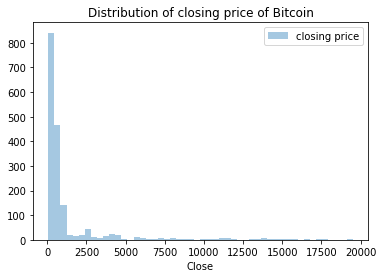

In [38]:
sns.distplot(joined_data['Close'], kde=False, label='closing price') #default bins using Freedman-Diaconis rule.
#sns.distplot(joined_data['Open'], kde=False, label='Open price') #default bins using Freedman-Diaconis rule.
#sns.distplot(joined_data['High'], kde=False, label='High price') #default bins using Freedman-Diaconis rule.
plt.title("Distribution of closing price of Bitcoin")
plt.legend(loc='best')
plt.show()

In [39]:
# import datetime

# fig, ax = plt.subplots(figsize=(12,8))
# x3 = [datetime.datetime.strptime(d,'%Y-%m-%d').date() for d in joined_data.Date]

# #joined_data
# joined_data['moving_avg'] =  joined_data['Close'].rolling(window=30).mean()
# #print(joined_data)


# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
# plt.plot(x3, joined_data.Close, label='closing price')
# plt.plot(x3, joined_data.moving_avg, color='red', label='moving average(close price)')
# plt.gcf().autofmt_xdate()
# plt.xlabel("Date", fontsize=15)
# plt.ylabel("Bitcoin Price", fontsize=15)
# plt.title("Bitcoin Price overtime", fontsize=20)
# plt.legend(loc='best')
# plt.show()

Day of week analysis

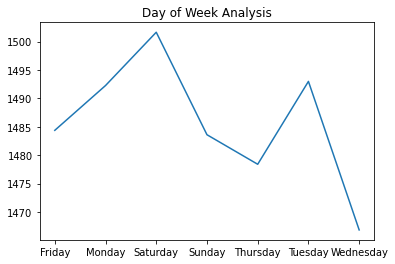

In [34]:
# joined_data['weekday'] = pd.to_datetime(joined_data['Date']).dt.weekday_name #it is deprecated now. 
joined_data['weekday'] = pd.to_datetime(joined_data['Date']).dt.day_name() #https://www.codegrepper.com/tpc/attributeerror%3A+%27datetimeproperties%27+object+has+no+attribute+%27weekday_name%27
week_data = joined_data.groupby(['weekday'], as_index=False)['Close'].agg({'mean': 'mean'})
day_of_week = pd.DataFrame(data=week_data)


plt.plot(figsize=(12,8))
plt.title('Day of Week Analysis')

my_xticks = np.array(day_of_week.weekday)
plt.xticks(range(len(week_data['mean'])), my_xticks)
plt.plot(range(len(week_data['mean'])), week_data['mean'])

In [35]:
joined_data['year'] = pd.to_datetime(joined_data['Date']).dt.year
joined_data['month'] = pd.to_datetime(joined_data['Date']).dt.month
# joined_data['weekday'] = pd.to_datetime(joined_data['Date']).dt.weekday_name
joined_data['weekday'] = pd.to_datetime(joined_data['Date']).dt.day_name()

#print(joined_data.weekday)

#week_data=joined_data.groupby(['weekday'])['Close'].mean()

mean_df = joined_data.groupby(['year','weekday'], as_index=False)['Close'].agg({'mean': 'mean'})
std_df = joined_data.groupby(['year','weekday'], as_index=False)['Close'].agg({'std': np.std})
min_df = joined_data.groupby(['year','weekday'], as_index=False)['Close'].agg({'min': np.min})
max_df = joined_data.groupby(['year','weekday'], as_index=False)['Close'].agg({'max': np.max})
median_df = joined_data.groupby(['year','weekday'], as_index=False)['Close'].agg({'median': np.median})



week_data = pd.concat([mean_df, std_df['std'], min_df['min'],max_df['max'], median_df['median']], axis=1)
week_data['var_coeff'] = std_df['std'] / mean_df['mean']

week_data.head(10)

year    weekday        mean         std     min      max   median  \
0  2013     Friday  257.139143  280.848792   68.43  1131.97  129.000   
1  2013     Monday  261.538056  275.899594   76.52  1043.33  127.025   
2  2013   Saturday  254.231429  272.544318   70.28  1129.43  128.550   
3  2013     Sunday  251.256389  260.742913   74.56   955.85  129.060   
4  2013   Thursday  260.195429  287.506580   80.53  1045.11  126.430   
5  2013    Tuesday  266.576667  286.679512   76.69  1078.28  126.875   
6  2013  Wednesday  251.185714  278.571893   77.53  1151.17  123.890   
7  2014     Friday  524.868846  145.159065  317.84   868.48  502.765   
8  2014     Monday  526.644038  153.177382  312.67   953.29  485.570   
9  2014   Saturday  526.892115  152.733838  315.86   913.95  502.905   

   var_coeff  
0   1.092206  
1   1.054912  
2   1.072032  
3   1.037756  
4   1.104964  
5   1.075411  
6   1.109028  
7   0.276563  
8   0.290856  
9   0.289877

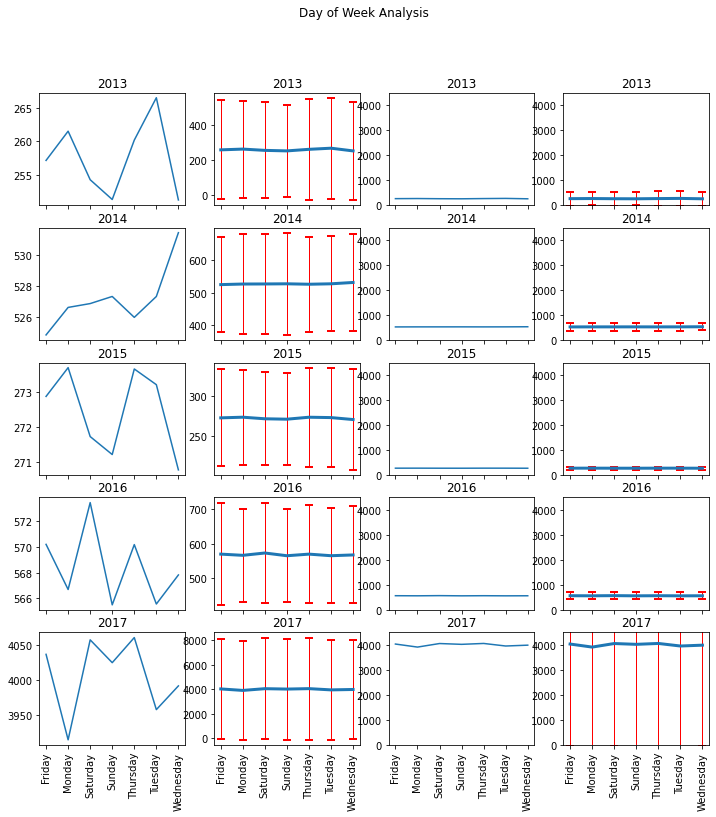

In [36]:
years = [2013,2014,2015,2016,2017]


fig, ax = plt.subplots(len(years),4,sharex=True, sharey=False ,figsize=(12,12))
fig.suptitle('Day of Week Analysis')

for i, year in enumerate(years):
    holder = week_data[week_data['year']==year]
    #print(holder)
    
    my_xticks = np.array(day_of_week.weekday)
    plt.xticks(range(len(holder['mean'])), my_xticks, rotation=90)
    
    ax[i][0].plot(range(len(holder['mean'])), holder['mean'])
   # ax[i][0].set_ylim(min(holder['mean']), max(holder['mean']))
    

    ax[i][1].errorbar(
    range(len(holder['mean'])),     # X
    holder['mean'],    # Y
    yerr=holder['std'],        # Y-errors
      # format line like for plot()
    linewidth=3,   # width of plot line
    elinewidth=1,# width of error bar line
    ecolor='r',    # color of error bar
    capsize=4,     # cap length for error bar
    capthick=2,  # cap thickness for error bar
    )
    

    ax[i][2].plot(range(len(holder['mean'])), holder['mean'])
    #ax[i][2].set_ylim(abs(max(holder['mean']) - max(holder['std'])), abs(max(holder['mean']) + max(holder['std'])))
    
    ax[i][3].errorbar(
    range(len(holder['mean'])),     # X
    holder['mean'],    # Y
    yerr=holder['std'],        # Y-errors
      # format line like for plot()
    linewidth=3,   # width of plot line
    elinewidth=1,# width of error bar line
    ecolor='r',    # color of error bar
    capsize=4,     # cap length for error bar
    capthick=2,  # cap thickness for error bar
    )
    
    
    ax[i][2].set_ylim(0, 4500) #these values are set by experimenting with 'sharey' attribute in subplots() function
                               #the goal is to compare the mean for all years relative to bitcoin increased price now
    ax[i][3].set_ylim(0, 4500)

    #ax[i].set_xlabel("Year"+" "+str(year),fontsize=10)
    #ax[i].set_ylabel("Bitcoin Price",fontsize=10)
    ax[i][0].set_title(year)
    ax[i][1].set_title(year)
    ax[i][2].set_title(year)   
    ax[i][3].set_title(year)  

for tick in ax[i][0].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[i][1].get_xticklabels():
    tick.set_rotation(90)
for tick in ax[i][2].get_xticklabels():
    tick.set_rotation(90)


#plt.savefig('yearly_dayofweek.png')
plt.show()

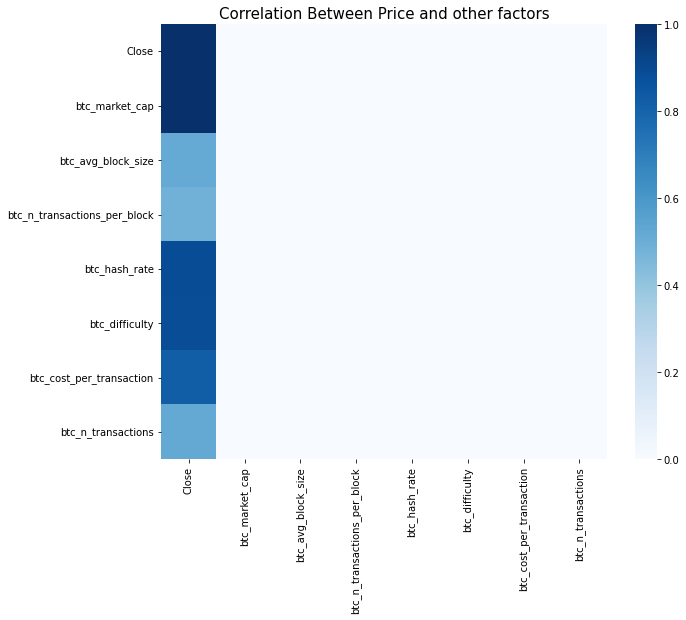

In [40]:
selected_col = joined_data[['Close','btc_market_cap',
                            'btc_avg_block_size',
                            'btc_n_transactions_per_block',
                            'btc_hash_rate',
                            'btc_difficulty',
                            'btc_cost_per_transaction',
                            'btc_n_transactions']]

selected_col.head()
corrmat = selected_col.corr(method='pearson')

columns = ['Close']
my_corrmat = corrmat.copy()
mask = my_corrmat.columns.isin(columns)
my_corrmat.loc[:, ~mask] = 0
#print(my_corrmat)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(my_corrmat, annot=False, fmt="f", cmap="Blues") #vmax=1., square=True)
plt.title("Correlation Between Price and other factors", fontsize=15)
#plt.savefig('variablecorrelation.png', bbox_inches='tight')
plt.show()